merchdata - 335k x 22
newmerchdata - 1.96m x 14
sample_submission - 124k x 2
test.csv - 124k x 5
train.csv - 202k x 6

train.csv - the training set

test.csv - the test set

sample_submission.csv - a sample submission file in the correct format - contains all card_ids you are expected to predict for.

historical_transactions.csv - up to 3 months' worth of historical transactions for each card_id

merchants.csv - additional information about all merchants / merchant_ids in the dataset.

new_merchant_transactions.csv - two months' worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# from keras.utils import to_categorical
# from keras import models
# from keras import layers


cwd = os.getcwd() # current working directory

# load train data
path = os.path.join(cwd, 'data', 'train.csv')
data = pd.read_csv(path)

# fitting basic linear regression
reg = LinearRegression().fit(data.iloc[:, 2:5], data['target'])

# R-squared and regression coefficients
Rsq = reg.score(data.iloc[:, 2:5], data['target'])
coeffs = reg.coef_
print("R^2 Value: ")
print(Rsq)
print("Regression Coefficients: ")
print(coeffs)

# loading historical transactions
transcpath = os.path.join(cwd, 'data', 'historical_transactions.csv')
#transcdata = pd.read_csv(transcpath, nrows=20000)
transcdata = pd.read_csv(transcpath)

# display all columns when requested
pd.set_option('display.max_columns', None)

#sns.pairplot(data.iloc[:, 2:6])


# loading merchants data
merchpath = os.path.join(cwd, 'data', 'merchants.csv')
merchdata = pd.read_csv(merchpath)

# loading merchants data
newmerchpath = os.path.join(cwd, 'data', 'new_merchant_transactions.csv')
newmerchdata = pd.read_csv(newmerchpath)

# loading train data
trainpath = os.path.join(cwd, 'data', 'train.csv')
train = pd.read_csv(trainpath)

# loading test data
testpath = os.path.join(cwd, 'data', 'test.csv')
test = pd.read_csv(testpath)

R^2 Value: 
0.0002726894676143843
Regression Coefficients: 
[-0.05378112 -0.04374847  0.01596472]


In [2]:
merchdata.head()


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [4]:
print(merchdata.shape)
list(merchdata)

(334696, 22)


['merchant_id',
 'merchant_group_id',
 'merchant_category_id',
 'subsector_id',
 'numerical_1',
 'numerical_2',
 'category_1',
 'most_recent_sales_range',
 'most_recent_purchases_range',
 'avg_sales_lag3',
 'avg_purchases_lag3',
 'active_months_lag3',
 'avg_sales_lag6',
 'avg_purchases_lag6',
 'active_months_lag6',
 'avg_sales_lag12',
 'avg_purchases_lag12',
 'active_months_lag12',
 'category_4',
 'city_id',
 'state_id',
 'category_2']

In [5]:
merchdata.groupby('merchant_id').nunique()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
merchant_id,,,,,,,,,,,,,,,,,,,,,,
M_ID_000025127f,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
M_ID_0000699140,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
M_ID_00006a5552,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
M_ID_000087311e,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
M_ID_0000ab0b2d,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
M_ID_0000edb21f,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
M_ID_0000f3475c,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
M_ID_0000fd7caf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
M_ID_0001c38687,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [6]:
repeats = pd.DataFrame(merchdata.merchant_id.value_counts())
repeats = repeats.reset_index()
repeats = repeats.rename(columns={"index":"merchant_id","merchant_id":"count"})
repeats.loc[1,'merchant_id']

'M_ID_ebbdb42da6'

In [7]:
merchdata.filter(merchant_id=repeats.loc[1,'merchant_id'])

TypeError: filter() got an unexpected keyword argument 'merchant_id'

In [ ]:
repeats2 = repeats.loc[repeats['count']>=2]
repeats2

In [8]:
merchdata.loc[merchdata['merchant_id'].isin(repeats2['merchant_id'])]

NameError: name 'repeats2' is not defined

In [9]:

newmerchdata.shape

(1963031, 14)

In [10]:
transcdata.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [11]:

train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [2]:
mergedtransc = pd.merge(transcdata,train,how='inner',on='card_id')
transcdata.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [3]:
mergedtransc.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,first_active_month,feature_1,feature_2,feature_3,target
0,N,C_ID_5037ff576e,322,N,1,B,278,M_ID_b61c7d1be0,-3,-0.595260,2017-09-07 20:57:19,3.0,11,37,2017-01,5,1,1,-2.352713
1,Y,C_ID_5037ff576e,138,N,1,B,307,M_ID_fe69229f24,-4,1.189469,2017-08-14 15:46:08,1.0,15,19,2017-01,5,1,1,-2.352713
2,Y,C_ID_5037ff576e,138,N,1,B,705,M_ID_efc106141c,-9,-0.640069,2017-03-05 14:57:51,1.0,15,33,2017-01,5,1,1,-2.352713
3,Y,C_ID_5037ff576e,226,N,1,B,307,M_ID_708022307c,-4,-0.652256,2017-08-15 10:45:28,1.0,16,19,2017-01,5,1,1,-2.352713
4,Y,C_ID_5037ff576e,330,N,1,B,705,M_ID_393b4b8cec,-9,-0.674210,2017-03-26 20:00:31,3.0,17,33,2017-01,5,1,1,-2.352713


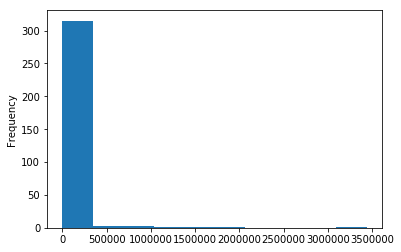

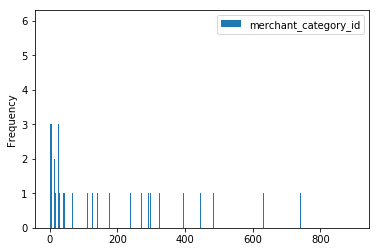

In [4]:
mergedtransc['merchant_category_id'].value_counts().plot.hist()
pd.DataFrame(mergedtransc['merchant_category_id'].value_counts()).plot.hist(range=[0,900],bins=900)
cat_id=int(pd.DataFrame(mergedtransc['merchant_category_id'].value_counts()).max())

In [5]:
mergedtransc[mergedtransc['merchant_category_id']==mergedtransc['merchant_category_id'].max()]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,first_active_month,feature_1,feature_2,feature_3,target
2963,Y,C_ID_3da75e85ea,69,N,0,A,891,M_ID_8084529ed0,0,0.755743,2018-02-24 11:15:54,1.0,9,29,2016-11,5,2,1,0.749383
10059,Y,C_ID_cf58d5be10,331,N,1,B,891,M_ID_914e8622f6,-10,-0.183414,2017-04-24 13:47:24,1.0,16,29,2016-10,5,1,1,0.854866
10100,N,C_ID_cf58d5be10,331,N,1,B,891,M_ID_914e8622f6,-10,-0.183414,2017-04-24 13:38:18,1.0,16,29,2016-10,5,1,1,0.854866
10128,Y,C_ID_cf58d5be10,331,N,1,B,891,M_ID_914e8622f6,-7,-0.548558,2017-07-26 14:09:51,1.0,16,29,2016-10,5,1,1,0.854866
10183,Y,C_ID_cf58d5be10,331,N,1,B,891,M_ID_914e8622f6,-10,-0.718357,2017-04-24 13:49:53,1.0,16,29,2016-10,5,1,1,0.854866
10212,N,C_ID_cf58d5be10,331,N,1,B,891,M_ID_914e8622f6,-10,-0.183414,2017-04-24 13:39:32,1.0,16,29,2016-10,5,1,1,0.854866
10534,Y,C_ID_cf58d5be10,331,N,1,B,891,M_ID_914e8622f6,-7,-0.708290,2017-07-26 14:10:36,1.0,16,29,2016-10,5,1,1,0.854866
10588,N,C_ID_cf58d5be10,331,N,1,B,891,M_ID_914e8622f6,-10,-0.718357,2017-04-24 13:48:14,1.0,16,29,2016-10,5,1,1,0.854866
15717,Y,C_ID_7332ad5a4a,88,N,0,A,891,M_ID_bf92bcbe97,-6,0.452358,2017-08-04 12:45:27,1.0,16,29,2015-10,2,2,0,2.582335
27216,Y,C_ID_59b56d1e88,8,N,0,A,891,M_ID_740f6bfba9,-10,-0.611669,2017-04-10 16:05:46,1.0,12,29,2017-01,5,2,1,0.162634


In [6]:
#filtered and merged
#fmtransc = mergedtransc.iloc[:,[0,1,2,3,4,6,18]][mergedtransc['authorized_flag']=='Y']
fmtransc = mergedtransc.loc[:,['card_id','month_lag','purchase_amount','target']]

#averaged
afmtransc = fmtransc.groupby('card_id').agg(np.mean)

In [13]:
mergedtransc['purchase_amount'].max()

6010603.9717525

In [15]:
merchdata["merchant_category_id"].nunique()

324

In [7]:
afmtransc[['month_lag','purchase_amount']]

,month_lag,purchase_amount
card_id,,
C_ID_00007093c1,-5.852349,-0.515739
C_ID_0001506ef0,-4.833333,-0.524271
C_ID_000183fdda,-2.451389,-0.478041
C_ID_00027503e2,-4.142857,-0.741025
C_ID_0002c7c2c1,-3.761194,-0.659458
C_ID_0003be3c83,-3.701754,-0.595905
C_ID_00042d509c,-1.274194,-0.631862
C_ID_0004888ddd,-4.024390,-0.707355
C_ID_0004b68c49,-1.400000,-0.504437


Text(0.5,1,'Purch Amt')

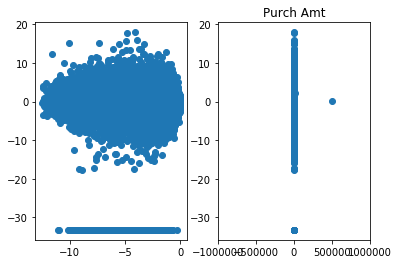

In [19]:
plt.subplot(121)
p1=plt.scatter(afmtransc['month_lag'],afmtransc['target'])
plt.subplot(122)
plt.xlim(-1000000,1000000)
p2=plt.scatter(afmtransc['purchase_amount'],afmtransc['target'])
plt.title("Purch Amt")

In [9]:
sorted(afmtransc['purchase_amount'],reverse=True)

[500883.0047239726,
 9625.442965462858,
 5744.861622572352,
 4723.148096014286,
 3290.9204306809515,
 2623.2602623269827,
 2503.9855923823525,
 1972.465634476875,
 1836.0195502564443,
 1609.5415273957146,
 1555.537197919822,
 1443.1818261520582,
 1417.3550080898112,
 1299.5890011302702,
 1279.5538740222216,
 1276.6634366699996,
 1269.3090144046482,
 1234.7255982545455,
 1222.1727844432853,
 1175.357026613478,
 1104.4309314289703,
 1098.456754798657,
 1072.738206265572,
 979.9559757243478,
 955.827889360909,
 938.5534048,
 901.909924374375,
 845.00316430625,
 841.7509722640739,
 834.2218102002778,
 786.6421936552381,
 782.1282993453124,
 709.4488243133333,
 684.2663519920258,
 683.5450170565957,
 676.688305685352,
 638.5245647691667,
 630.8705095181515,
 622.4466978168293,
 559.4163180522728,
 546.7692063597219,
 538.0432120358333,
 511.69274451439406,
 473.42054686268773,
 463.72859993987174,
 460.5910420831035,
 451.5378365524779,
 425.9455329421102,
 415.2821278204255,
 401.759236843

In [90]:
from keras.utils import to_categorical
from keras import models
from keras import layers

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [127]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
afmtransc2 = afmtransc.reset_index()

clf.fit(afmtransc2[['month_lag','purchase_amount']],afmtransc2['target'])

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [131]:
predvalues=clf.predict(afmtransc2[['month_lag','purchase_amount']])

In [137]:
errors=np.sqrt(np.mean((predvalues-afmtransc2['target'])**2))

3.8477559653532003